In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA
from pandas import datetime
from datetime import timedelta


path = "C:/Users/HP/Desktop/Mangalore-TMC-Adhil.csv"
data = pd.read_csv(path)

In [104]:
data.head()

,TIME,TMC
0,Jan-03,559
1,Feb-03,333
2,Mar-03,424
3,Apr-03,337
4,May-03,367


In [105]:
dateparse = lambda dates : pd.datetime.strptime(dates,'%b-%y')
data = pd.read_csv(path, parse_dates =['TIME'],index_col = 'TIME',date_parser = dateparse)

data

,TMC
TIME,
2003-01-01,559
2003-02-01,333
2003-03-01,424
2003-04-01,337
2003-05-01,367
2003-06-01,569
2003-07-01,955
2003-08-01,1338
2003-09-01,1098


Text(0.5, 1.0, 'Mangalore TMC Time Series Data')

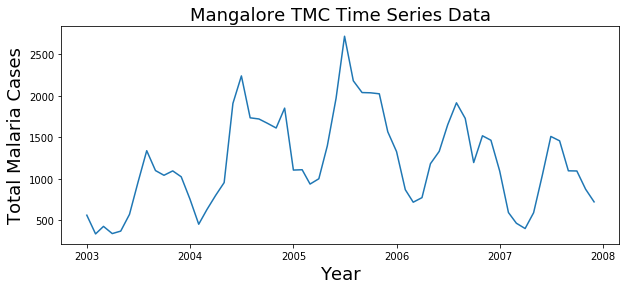

In [106]:
plt.figure(figsize = (10,4))
plt.plot(data)
plt.ylabel("Total Malaria Cases", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.title("Mangalore TMC Time Series Data", fontsize = 18)



In [107]:
data.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01',
               '2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01', '2004-11-01', '2004-12-01',
               '2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01',
               '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01',
               '2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
      

In [109]:
ts = data['TMC']

In [110]:
train_end = datetime(2006,12,1)
test_end = datetime(2007,12,1)

train_data = ts[:train_end]
test_data = ts[train_end + timedelta(days = 1):test_end]






Text(0.5, 1.0, 'Training Data')

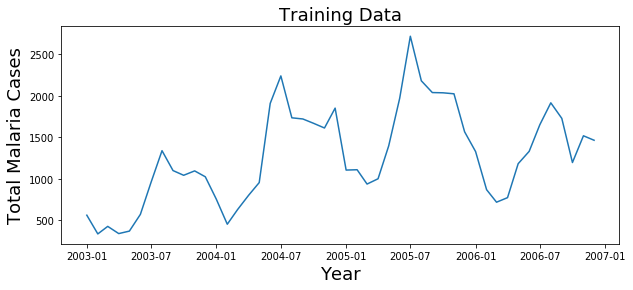

In [111]:
plt.figure(figsize = (10,4))
plt.plot(train_data)
plt.ylabel("Total Malaria Cases", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.title("Training Data", fontsize = 18)





Text(0.5, 1.0, 'Test Data')

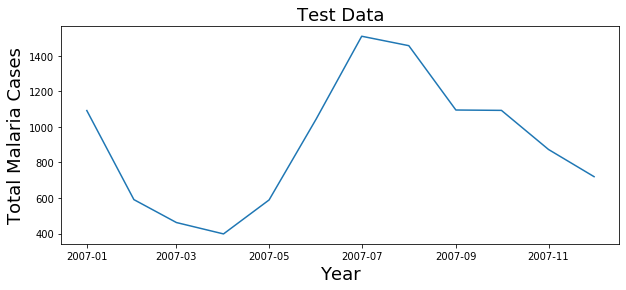

In [112]:
plt.figure(figsize = (10,4))
plt.plot(test_data)
plt.ylabel("Total Malaria Cases", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.title("Test Data", fontsize = 18)



In [113]:
train_log = np.log(train_data)

In [114]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    orig = plt.plot(timeseries, color = "blue", label = "original")
    mean = plt.plot(rolmean, color = "red", label = "rolling mean")
    std = plt.plot(rolstd, color = 'black', label = "Rolling std")
    plt.legend(loc = 'best')
    plt.title("Rolling mean and standard deviation")
    plt.show(block = False)
    print("Results of dickey-fuller test :")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','P-value','#Lags used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)  

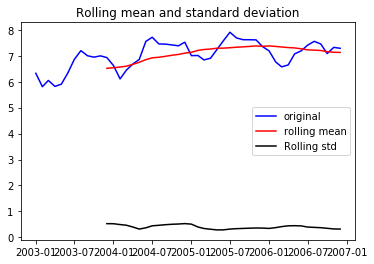

Results of dickey-fuller test :
Test Statistic                 -3.314196
P-value                         0.014256
#Lags used                      1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [115]:
test_stationarity(train_log)

In [116]:
weighted_moving_average = train_log.ewm(halflife = 2).mean()

In [117]:
weighted_moving_average

TIME
2003-01-01    6.326149
2003-02-01    6.022708
2003-03-01    6.034953
2003-04-01    5.951041
2003-05-01    5.934789
2003-06-01    6.071726
2003-07-01    6.325542
2003-08-01    6.598406
2003-09-01    6.721850
2003-10-01    6.790206
2003-11-01    6.852321
2003-12-01    6.875581
2004-01-01    6.801091
2004-02-01    6.596859
2004-03-01    6.550940
2004-04-01    6.589877
2004-05-01    6.669100
2004-06-01    6.928887
2004-07-01    7.159358
2004-08-01    7.247137
2004-09-01    7.306789
2004-10-01    7.339958
2004-11-01    7.353223
2004-12-01    7.403261
2005-01-01    7.287089
2005-02-01    7.206013
2005-03-01    7.098961
2005-04-01    7.042662
2005-05-01    7.100864
2005-06-01    7.243048
2005-07-01    7.437925
2005-08-01    7.511171
2005-09-01    7.543253
2005-10-01    7.565507
2005-11-01    7.579513
2005-12-01    7.514129
2006-01-01    7.419392
2006-02-01    7.227736
2006-03-01    7.036167
2006-04-01    6.922384
2006-05-01    6.966826
2006-06-01    7.033051
2006-07-01    7.143204
2006-0

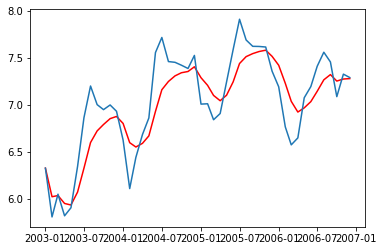

In [118]:
plt.plot(weighted_moving_average,color ='red')
plt.plot(train_log)


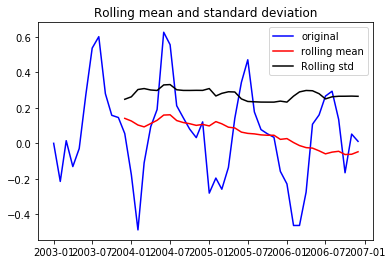

Results of dickey-fuller test :
Test Statistic                 -4.342960
P-value                         0.000374
#Lags used                      3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [119]:
train_log_diff = train_log - weighted_moving_average
test_stationarity(train_log_diff)


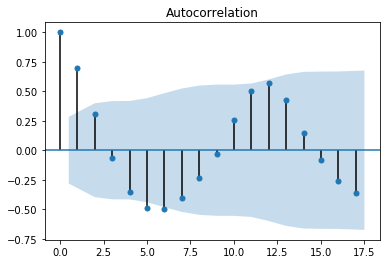

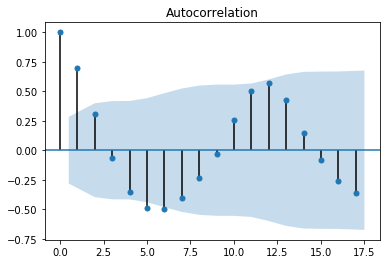

In [120]:
plot_acf(train_log_diff)


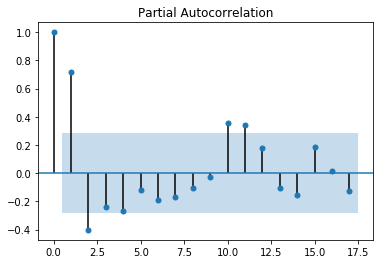

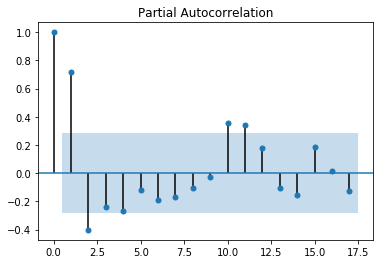

In [121]:
plot_pacf(train_log_diff)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5287')

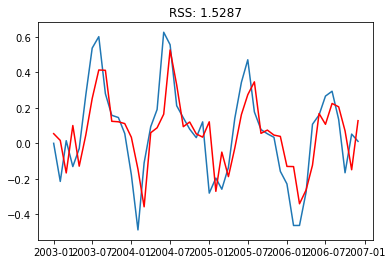

In [122]:
model = ARMA(train_log_diff, order=(1,1))  
results_ARMA = model.fit(disp=-1)  
plt.plot(train_log_diff)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARMA.fittedvalues-train_log_diff)**2))

In [123]:
predictions_ARMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARMA_diff.head()

TIME
2003-01-01    0.059475
2003-02-01    0.018645
2003-03-01   -0.175262
2003-04-01    0.075761
2003-05-01   -0.052527
dtype: float64

In [124]:
predictions_ARMA_log = predictions_ARMA_diff.add(weighted_moving_average)

Text(0.5, 1.0, 'RMSE: 204.9847')

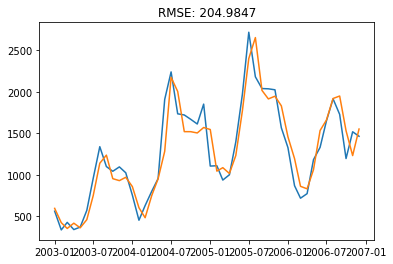

In [127]:
predictions_ARMA = np.exp(predictions_ARMA_log)
plt.plot(train_data)
plt.plot(predictions_ARMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARMA-train_data)**2)/len(train_data)))

In [128]:
test_log = np.log(test_data)
weighted_moving_average_test = test_log.ewm(halflife = 2).mean()
test_log_diff = test_log - weighted_moving_average_test
test_log_diff


TIME
2007-01-01    0.000000
2007-02-01   -0.254306
2007-03-01   -0.273764
2007-04-01   -0.257733
2007-05-01    0.086480
2007-06-01    0.438322
2007-07-01    0.547970
2007-08-01    0.352206
2007-09-01    0.046178
2007-10-01    0.030941
2007-11-01   -0.135758
2007-12-01   -0.230717
Name: TMC, dtype: float64

In [129]:
pred_start_date = test_log_diff.index[0]
pred_end_date = test_log_diff.index[-1]
predictions = results_AR.predict(start = pred_start_date, end = pred_end_date)
predictions

2007-01-01    0.033443
2007-02-01    0.056564
2007-03-01    0.074364
2007-04-01    0.083689
2007-05-01    0.084379
2007-06-01    0.078522
2007-07-01    0.069333
2007-08-01    0.060034
2007-09-01    0.053032
2007-10-01    0.049513
2007-11-01    0.049463
2007-12-01    0.051986
Freq: MS, dtype: float64

In [130]:
predictions_log = predictions.add(weighted_moving_average_test)
predictions_log.dropna()

2007-01-01    7.029209
2007-02-01    6.692686
2007-03-01    6.483693
2007-04-01    6.327874
2007-05-01    6.376325
2007-06-01    6.591015
2007-07-01    6.841227
2007-08-01    6.991963
2007-09-01    7.005363
2007-10-01    7.015253
2007-11-01    6.957157
2007-12-01    6.861954
Freq: MS, dtype: float64

Text(0.5, 1.0, 'RMSE: 252.3416')

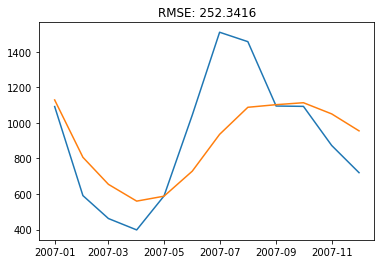

In [131]:
predictions_test = np.exp(predictions_log)
plt.plot(test_data)
plt.plot(predictions_test)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_test-test_data)**2)/len(test_data)))

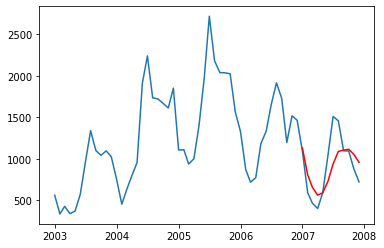

In [132]:
plt.plot(data)
plt.plot(predictions_test, color ='red')

In [133]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data = data[:end_date - timedelta(days = 1)]
    model = ARMA(train_data, order = (1,1))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date]= pred.loc[end_date]

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base

In [134]:
rolling_residuals = test_data - predictions_rolling

Text(0, 0.5, 'Error')

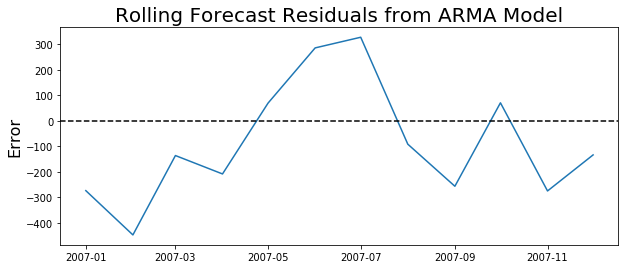

In [135]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

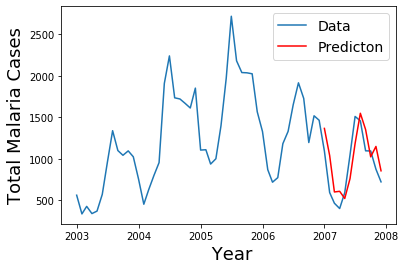

In [136]:
plt.plot(data)
plt.plot(predictions_rolling, color = 'red')
plt.ylabel("Total Malaria Cases", fontsize = 18)
plt.xlabel(" Year", fontsize = 18)
plt.legend(('Data','Predicton'), fontsize = 14)

In [137]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 241.9582523661665
